## Análisis de texto

En este caso práctico haremos una revisión general de cómo podemos analizar y procesar textos desde una perspectiva descriptiva.

El caso está estructurado así:

1. Carga y exploración de texto
2. Procesos de limpieza y transformación en texto
3. Representaciones de conteos

**Contexto:** Muchas empresas y entidades estan monitoreando constantemente los comentarios que hay en redes sociales sobre sus productos y servicios para identificar rápidamente molestias e inquietudes de sus clientes. Así poder tomar decisiones y medidas eficientemente evitando que su imagen se vea damnificada

**Pregunta de negocio:** En este caso analizaremos una muestra de tweets relacionados con el banco Davivienda. El objetivo es analizar cuáles pueden ser los temas tendencia en estos tweets y qué hallazgos se encuentran en ellos

In [22]:
# ruta directorio
#setwd('C:/Users/Juliana/Desktop/Diplomado/D_2020/Casos/Casos/TextMining') 
setwd('/root/Documentos/UN/UN_2020_2/DCD/module_4/class_6/jupyter')

# cargue librerias 
library(tokenizers)
library(tidyverse)
library(tm)
library(stopwords)
library(textstem)
library(wordcloud)
library(udpipe)
library(dplyr)

In [23]:
library(repr)

In [24]:
## Cargue de datos
tx <- read.csv('data/tweets.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1")
head(tx)

,texto
,<chr>
1,"RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES"
2,"Explicó que en lo corrido del año los resultados del grueso de las compañías son saludables, jalonados por menores impuestos, menor apalancamiento y costo de crédito, lo cual favorece las utilidades. #ValoraAnalitik"
3,"Nuevo #TipoDeCambio en Banco Davivienda (Costa Rica) S.A Compra: ¢591,00 ?? Venta: ¢605,00 ?? Diferencial: ¢14,00 $CRCUSD"
4,No les pasa que se sienten como davivienda. Ya uno no puede ni pensar ????
5,"Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES"
6,"RT @cathurtadof: Estoy en @JardinplazaCC y los cajeros de @davivienda están en remodelación y el unico que quedaba se encuentra sin efectivo. Me siento en el lugar equivocado, en el centro comercial y sin dinero que gastar @LugarEquivocado"


## Manejo de textos

**Tokenizar oraciones**

In [25]:
# tokenizar oraciones
tokenize_sentences(as.character(tx[1,1])) 

[[1]]
[1] "RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019."
[2] "Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES"

**Tokenizar palabras**

In [26]:
# tokenizar palabras
tokenize_words(as.character(tx[2,1]))

[[1]]
 [1] "explicó"        "que"            "en"             "lo"            
 [5] "corrido"        "del"            "año"            "los"           
 [9] "resultados"     "del"            "grueso"         "de"            
[13] "las"            "compañías"      "son"            "saludables"    
[17] "jalonados"      "por"            "menores"        "impuestos"     
[21] "menor"          "apalancamiento" "y"              "costo"         
[25] "de"             "crédito"        "lo"             "cual"          
[29] "favorece"       "las"            "utilidades"     "valoraanalitik"

**Tamaño de tweets**

[1] 183.0334

[1] 13

[1] 578

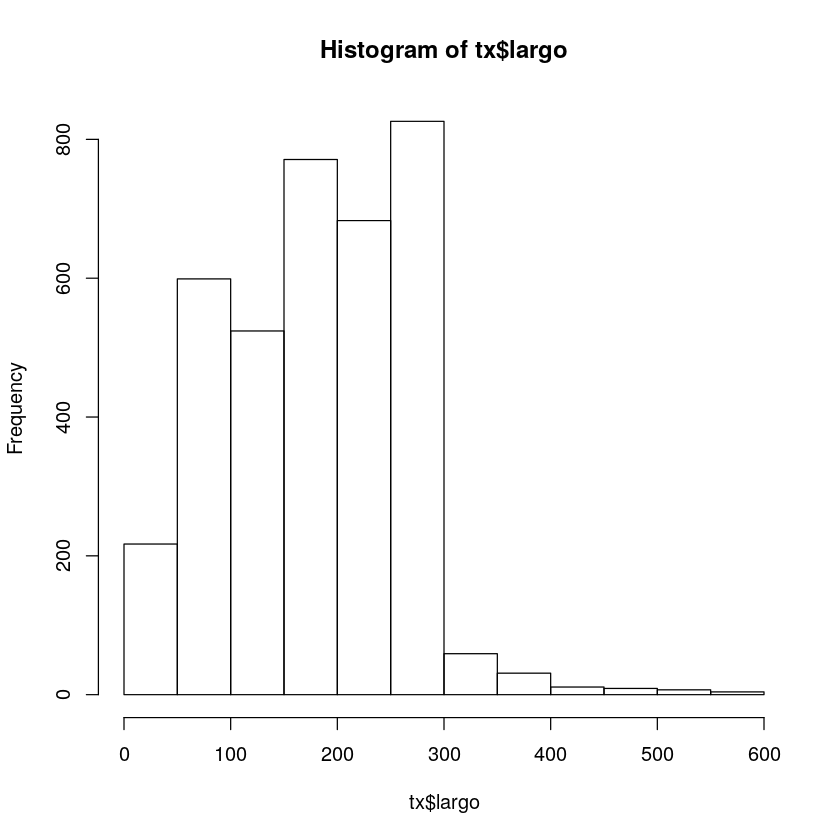

In [27]:
# tamaño de los tweets
tx$largo = nchar(as.character(tx$texto))
mean(tx$largo)
min(tx$largo)
max(tx$largo)

hist(tx$largo)

## Palabras o tokens mas frecuentes

In [28]:
## tokens mas frecuentes
palabras <- paste(tx$texto,collapse='\n')
words <- tokenize_words(palabras,lowercase = FALSE, strip_numeric = FALSE,strip_punct = FALSE)
asdf<-table(words)
tab <- tibble(word = names(asdf), count = as.numeric(asdf))
arrange(tab,desc(count))

word,count
<chr>,<dbl>
@,6148
.,5586
de,4523
",",3826
?,2887
:,2611
el,2593
en,2555
Davivienda,2329


In [29]:
# to lower 
as.character(tx[1,1])
tolower(as.character(tx[1,1]))

[1] "RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES"

[1] "rt @davicorredores: actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. conozca más aquí #presentaciónsemanal #mercados #acciones #colcap #tes"

**Remover @, # con expresiones regulares**

In [30]:
# caracteres especiales
gsub('[@w+|#]','',as.character(tx[1,1]))

[1] "RT davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí PresentaciónSemanal Mercados Acciones Colcap TES"

**Remover signos de puntuación**

In [31]:
# puntuación 
gsub('[[:punct:] ]+',' ',as.character(tx[1,1]))
removePunctuation(as.character(tx[1,1])) # librería tm

[1] "RT davicorredores Actualizamos nuestro pronóstico de inflación ahora en davivienda esperamos una inflación de 3 97 al finalizar 2019 Conozca más aquí PresentaciónSemanal Mercados Acciones Colcap TES"

[1] "RT davicorredores Actualizamos nuestro pronóstico de inflación ahora en davivienda esperamos una inflación de 397 al finalizar 2019 Conozca más aquí PresentaciónSemanal Mercados Acciones Colcap TES"

Luego de hacer esta limpieza inicial cómo varían las palabras/tokens más frecuente

In [32]:
# frecuencias con modificaciones 
words <- tokenize_words(palabras,lowercase = TRUE, strip_numeric = FALSE,strip_punct = TRUE)
asdf<-table(words)
tab <- tibble(word = names(asdf), count = as.numeric(asdf))
arrange(tab,desc(count))

word,count
<chr>,<dbl>
de,4669
davivienda,3850
el,2977
en,2825
a,2396
la,2245
y,2108
que,2073
rt,1888


**¿Qué tipo de palabras encontramos en la lista de las más frecuentes?**

Naturalmente las palabras más comunes suelen ser "palabras vacías" que no añaden mucho significado al texto como artículos, pronombres y preposiciones. Lo más aconsejable es no considerarlas en el análisis ya que traen mucho ruido y no permiten identificar aquellas palabras que si son relevantes para el análisis

**stopwords**

In [33]:
## stopwords
stopwords::stopwords("es")

[1] "de"           "la"           "que"          "el"           "en"          
  [6] "y"            "a"            "los"          "del"          "se"          
 [11] "las"          "por"          "un"           "para"         "con"         
 [16] "no"           "una"          "su"           "al"           "lo"          
 [21] "como"         "más"          "pero"         "sus"          "le"          
 [26] "ya"           "o"            "este"         "sí"           "porque"      
 [31] "esta"         "entre"        "cuando"       "muy"          "sin"         
 [36] "sobre"        "también"      "me"           "hasta"        "hay"         
 [41] "donde"        "quien"        "desde"        "todo"         "nos"         
 [46] "durante"      "todos"        "uno"          "les"          "ni"          
 [51] "contra"       "otros"        "ese"          "eso"          "ante"        
 [56] "ellos"        "e"            "esto"         "mí"           "antes"       
 [61] "algunos"      "qué"          "unos"         "yo"           "otro"        
 [66] "otras"        "otra"         "él"           "tanto"        "esa"         
 [71] "estos"        "mucho"        "quienes"      "nada"         "muchos"      
 [76] "cual"         "poco"         "ella"         "estar"        "estas"       
 [81] "algunas"      "algo"         "nosotros"     "mi"           "mis"         
 [86] "tú"           "te"           "ti"           "tu"           "tus"         
 [91] "ellas"        "nosotras"     "vosotros"     "vosotras"     "os"          
 [96] "mío"          "mía"          "míos"         "mías"         "tuyo"        
[101] "tuya"         "tuyos"        "tuyas"        "suyo"         "suya"        
[106] "suyos"        "suyas"        "nuestro"      "nuestra"      "nuestros"    
[111] "nuestras"     "vuestro"      "vuestra"      "vuestros"     "vuestras"    
[116] "esos"         "esas"         "estoy"        "estás"        "está"        
[121] "estamos"      "estáis"       "están"        "esté"         "estés"       
[126] "estemos"      "estéis"       "estén"        "estaré"       "estarás"     
[131] "estará"       "estaremos"    "estaréis"     "estarán"      "estaría"     
[136] "estarías"     "estaríamos"   "estaríais"    "estarían"     "estaba"      
[141] "estabas"      "estábamos"    "estabais"     "estaban"      "estuve"      
[146] "estuviste"    "estuvo"       "estuvimos"    "estuvisteis"  "estuvieron"  
[151] "estuviera"    "estuvieras"   "estuviéramos" "estuvierais"  "estuvieran"  
[156] "estuviese"    "estuvieses"   "estuviésemos" "estuvieseis"  "estuviesen"  
[161] "estando"      "estado"       "estada"       "estados"      "estadas"     
[166] "estad"        "he"           "has"          "ha"           "hemos"       
[171] "habéis"       "han"          "haya"         "hayas"        "hayamos"     
[176] "hayáis"       "hayan"        "habré"        "habrás"       "habrá"       
[181] "habremos"     "habréis"      "habrán"       "habría"       "habrías"     
[186] "habríamos"    "habríais"     "habrían"      "había"        "habías"      
[191] "habíamos"     "habíais"      "habían"       "hube"         "hubiste"     
[196] "hubo"         "hubimos"      "hubisteis"    "hubieron"     "hubiera"     
[201] "hubieras"     "hubiéramos"   "hubierais"    "hubieran"     "hubiese"     
[206] "hubieses"     "hubiésemos"   "hubieseis"    "hubiesen"     "habiendo"    
[211] "habido"       "habida"       "habidos"      "habidas"      "soy"         
[216] "eres"         "es"           "somos"        "sois"         "son"         
[221] "sea"          "seas"         "seamos"       "seáis"        "sean"        
[226] "seré"         "serás"        "será"         "seremos"      "seréis"      
[231] "serán"        "sería"        "serías"       "seríamos"     "seríais"     
[236] "serían"       "era"          "eras"         "éramos"       "erais"       
[241] "eran"         "fui"          "fuiste"       "fue"          "fuimos"      
[246] "fuisteis"     "fueron"    

Removamos de nuestro texto las stopwords. Una vez hecha la limpieza ya podemos entonces verificar cuáles son las palabras más frecuentes en esta muestra de tweets

In [34]:
# con tm 
tx$texto_l <- removeWords(as.character(tx$texto),stopwords("spanish"))
palabras <- paste(tx$texto_l,collapse='\n')
words <- tokenize_words(palabras,lowercase = TRUE, strip_numeric = FALSE,strip_punct = TRUE)
asdf<-table(words)
tab <- tibble(word = names(asdf), count = as.numeric(asdf))
arrange(tab,desc(count))

word,count
<chr>,<dbl>
davivienda,3851
rt,1888
si,612
bancolombia,576
banco,522
no,510
cuenta,489
grupo,447
bancos,429


In [35]:
# con la funcion tokenize_words
palabras <- paste(tx$texto,collapse='\n')
words <- tokenize_words(palabras,lowercase = TRUE, strip_numeric = FALSE,strip_punct = TRUE,stopwords = stopwords::stopwords("es"))
asdf<-table(words)
tab <- tibble(word = names(asdf), count = as.numeric(asdf))
arrange(tab,desc(count))

word,count
<chr>,<dbl>
davivienda,3850
rt,1888
si,612
bancolombia,576
banco,522
cuenta,489
grupo,447
bancos,429
luchyb,422


**n-gramas**

In [36]:
## ngrams
# bigram
test <- tokenize_ngrams(palabras,n=2,lowercase = TRUE,stopwords = stopwords::stopwords("es"))
pre <- table(test)
tab <- tibble(ngram = names(pre), count = as.numeric(pre))
arrange(tab,desc(count))

ngram,count
<chr>,<dbl>
rt luchyb,402
bancolombia davivienda,268
grupo aval,246
sistema financiero,243
davivienda rt,220
banco davivienda,207
lugar equivocado,168
cuenta davivienda,160
grupo bolivar,139


In [37]:
# trigram
test <- tokenize_ngrams(palabras,n=3,lowercase = TRUE,stopwords = stopwords::stopwords("es"))
pre <- table(test)
tab <- tibble(ngram = names(pre), count = as.numeric(pre))
arrange(tab,desc(count))

ngram,count
<chr>,<dbl>
davivienda ahorros 506100124201,134
casi quiebran davivienda,132
4 x 1000,131
davivienda año 99,131
x 1000 si,131
1000 si trabajaba,130
99 cuantos bancos,130
año 99 cuantos,130
bancos quebraron terminamos,130


## Llevar texto a vectores

In [38]:
#  matriz tdm
corp <- Corpus(VectorSource(as.character(tx$texto)))
tdm <- as.matrix(DocumentTermMatrix(corp,control = list(removePunctuation = TRUE,stopwords = TRUE)))
tdm[1:10,1:15]

,2019,397,acciones,actualizamos,ahora,aquí,colcap,conozca,davicorredores,davivienda,esperamos,finalizar,inflación,mercados,más
1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,1,1,1,1,1,1,1,0,1,1,1,2,1,1
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Wordcloud**

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeWords, stopwords("spanish")):
“transformation drops documents”


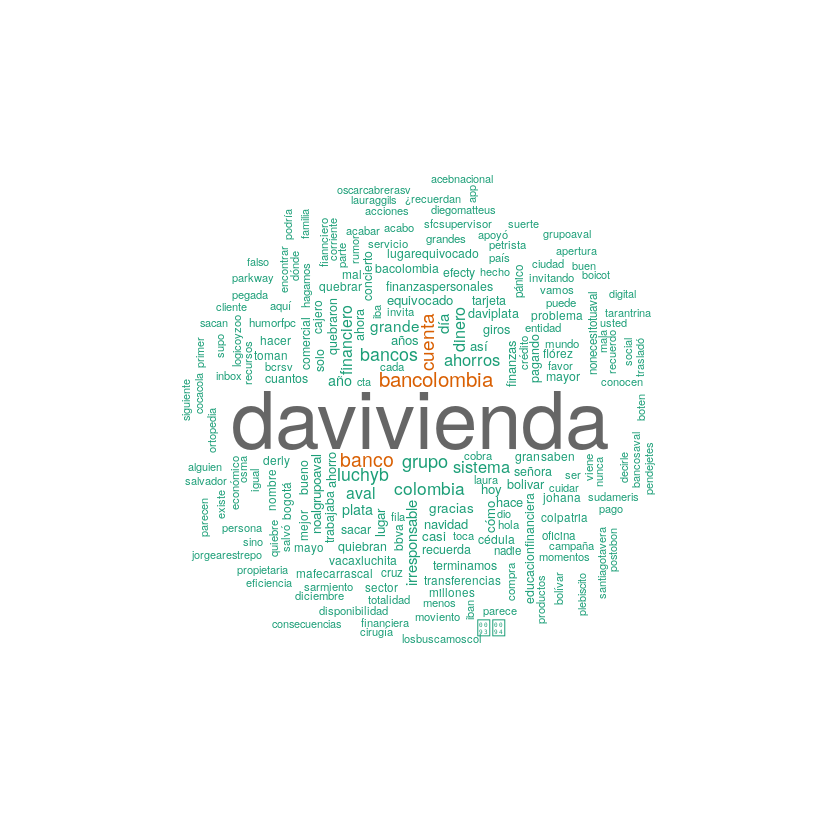

In [39]:
# wordcloud
corp <- corp %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
corp <- tm_map(corp, content_transformer(tolower))
corp <- tm_map(corp, removeWords, stopwords("spanish"))


dtm <- TermDocumentMatrix(corp) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
df <- data.frame(word = names(words),freq=words)

set.seed(1234) # for reproducibility 
wordcloud(words = df$word, freq = df$freq, min.freq = 5,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

## Otras transformaciones de texto


**Lemmatización**

In [40]:
vector <- c("trouble", "troubling", "troubled")
lemmatize_words(vector)
vector <- c("corria", "corre", "corren")
lemmatize_words(vector)

[1] "trouble" "trouble" "trouble"

[1] "corria" "corre"  "corren"

**POS**

In [41]:
## english 
sent <- c("Juliana is having a good day")
df <- data.frame(sent, stringAsFactors = FALSE)
udmodel <- udpipe_download_model(language = "english")
udmodel <- udpipe_load_model(file = udmodel$file_model)

x <- udpipe_annotate(udmodel,df$sent)
x <- as.data.frame(x)
x %>% select(token, upos)


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




token,upos
<chr>,<chr>
Juliana,PROPN
is,AUX
having,VERB
a,DET
good,ADJ
day,NOUN


In [42]:
# spanish
sent <- c("Juliana tiene un buen día")
df <- data.frame(sent, stringAsFactors = FALSE)


udmodel <- udpipe_download_model(language = "spanish")
udmodel <- udpipe_load_model(file = udmodel$file_model)


x <- udpipe_annotate(udmodel,df$sent)
x <- as.data.frame(x)
x %>% select(token, upos)


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




token,upos
<chr>,<chr>
Juliana,PROPN
tiene,VERB
un,DET
buen,ADJ
día,NOUN
